In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import my_library.gluex_style as gxs 
import os

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
os.nice(18)

18

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data').Filter('abs(pipkmks_m - 1.28) <= 0.028')
df_pipkmks = df_pipkmks.Define('kk_px', 'km_px + ks_px')
df_pipkmks = df_pipkmks.Define('kk_py', 'km_py + ks_py')
df_pipkmks = df_pipkmks.Define('kk_pz', 'km_pz + ks_pz')
df_pipkmks = df_pipkmks.Define('kk_E', 'km_E + ks_E')
df_pipkmks = df_pipkmks.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')


In [4]:
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data').Filter('abs(pimkpks_m - 1.28) <= 0.028')
df_pimkpks = df_pimkpks.Define('kk_px', 'kp_px + ks_px')
df_pimkpks = df_pimkpks.Define('kk_py', 'kp_py + ks_py')
df_pimkpks = df_pimkpks.Define('kk_pz', 'kp_pz + ks_pz')
df_pimkpks = df_pimkpks.Define('kk_E', 'kp_E + ks_E')
df_pimkpks = df_pimkpks.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')

In [17]:
hist_kk_pipkmks = df_pipkmks.Histo1D(('hist_kk', ';M(K^{-}K_{s}) [GeV]', 50, 0.992, 1.148), 'kk_m')
hist_kk_pimkpks = df_pimkpks.Histo1D(('hist_kk', ';M(K^{+}K_{s}) [GeV]', 50, 0.992, 1.148), 'kk_m')
hist_kspip = df_pipkmks.Histo1D(('hist_kspip', ';M(K_s#pi^{+}) [GeV]', 50, 0.632, 0.804), 'kspip_m')
hist_kspim = df_pimkpks.Histo1D(('hist_kspim', ';M(K_s#pi^{-}) [GeV]', 50, 0.632, 0.804), 'kspim_m')
hist_kmpip = df_pipkmks.Histo1D(('hist_kmpip', ';M(K^{-}#pi^{+}) [GeV]', 50, 0.632, 0.804), 'kmpip_m')
hist_kppim = df_pimkpks.Histo1D(('hist_kppim', ';M(K^{+}#pi^{-}) [GeV]', 50, 0.632, 0.804), 'kppim_m')
df_pipkmks.Count().GetValue()
df_pimkpks.Count().GetValue()

21777

In [18]:
hist_kk_pipkmks.Scale(1/hist_kk_pipkmks.Integral())
hist_kk_pimkpks.Scale(1/hist_kk_pimkpks.Integral())
hist_kspip.Scale(1/hist_kspip.Integral())
hist_kspim.Scale(1/hist_kspim.Integral())
hist_kmpip.Scale(1/hist_kmpip.Integral())
hist_kppim.Scale(1/hist_kppim.Integral())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


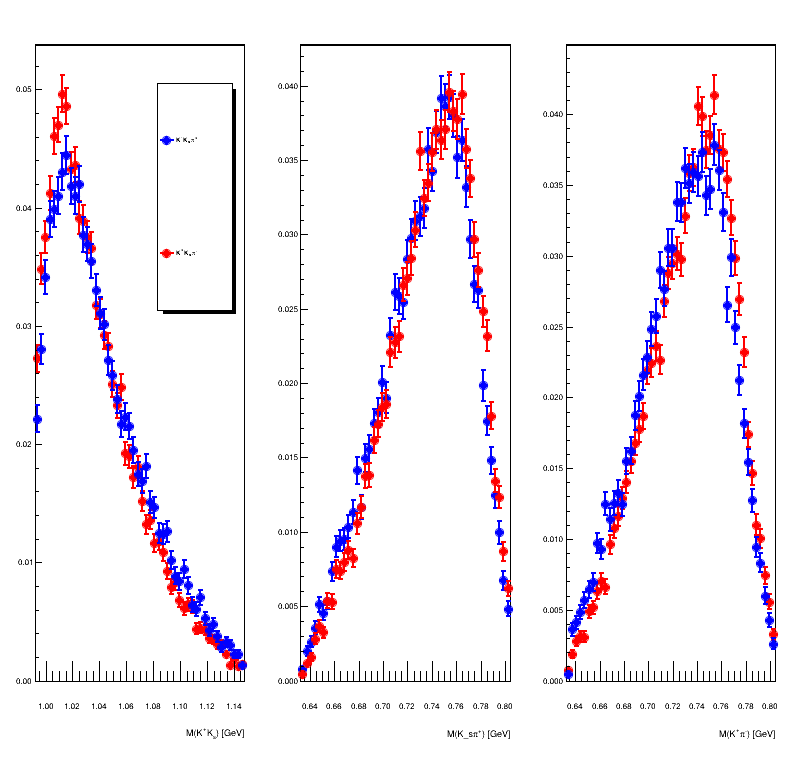

In [19]:
c = ROOT.TCanvas('c', 'c', 800, 800)
c.Divide(3, 1)
c.cd(1)
hist_kk_pipkmks.SetLineColor(ROOT.kBlue)
hist_kk_pipkmks.SetMarkerColor(ROOT.kBlue)
hist_kk_pipkmks.SetMarkerStyle(20)
hist_kk_pimkpks.SetLineColor(ROOT.kRed)
hist_kk_pimkpks.SetMarkerColor(ROOT.kRed)
hist_kk_pimkpks.SetMarkerStyle(20)
hist_kk_pimkpks.Draw("E1")
hist_kk_pipkmks.Draw("E1 SAME")
legend = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend.AddEntry(hist_kk_pipkmks.GetPtr(), 'K^{-}K_{s}#pi^{+}', 'lp')
legend.AddEntry(hist_kk_pimkpks.GetPtr(), 'K^{+}K_{s}#pi^{-}', 'lp')
legend.Draw()
c.cd(2)
hist_kspip.SetLineColor(ROOT.kBlue)
hist_kspip.SetMarkerColor(ROOT.kBlue)
hist_kspip.SetMarkerStyle(20)
hist_kspim.SetLineColor(ROOT.kRed)
hist_kspim.SetMarkerColor(ROOT.kRed)
hist_kspim.SetMarkerStyle(20)
hist_kspip.Draw("E1")
hist_kspim.Draw("E1 SAME")
c.cd(3)
hist_kmpip.SetLineColor(ROOT.kBlue)
hist_kmpip.SetMarkerColor(ROOT.kBlue)
hist_kmpip.SetMarkerStyle(20)
hist_kppim.SetLineColor(ROOT.kRed)
hist_kppim.SetMarkerColor(ROOT.kRed)
hist_kppim.SetMarkerStyle(20)
hist_kppim.Draw("E1")
hist_kmpip.Draw("E1 SAME")
c.Draw()



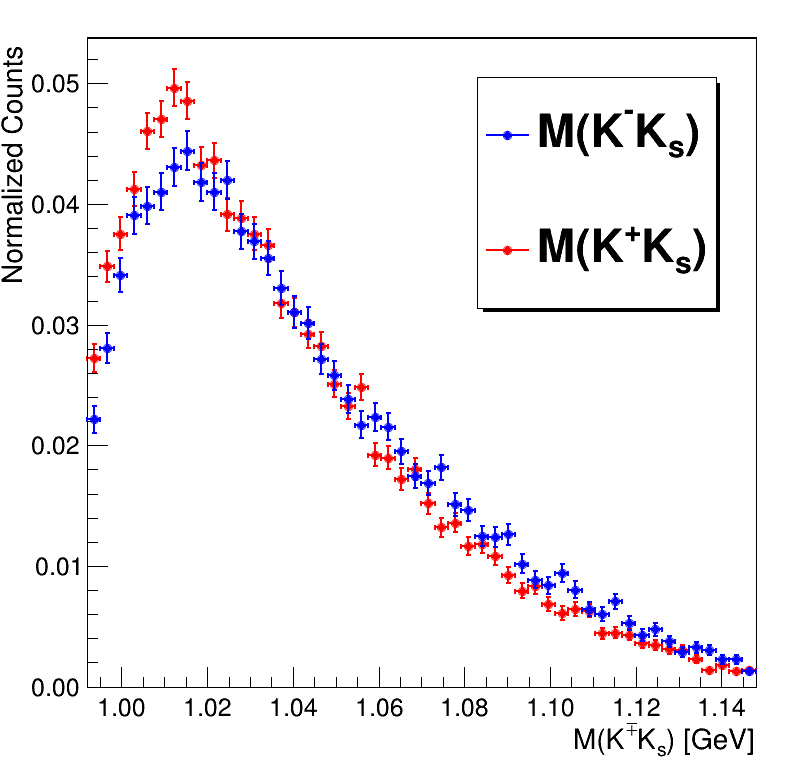

In [20]:
c.Clear()
hist_kk_pimkpks.GetYaxis().SetTitle("Normalized Counts")
hist_kk_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_kk_pimkpks.GetXaxis().SetTitle("M(K^{#mp}K_{s}) [GeV]")
hist_kk_pimkpks.Draw("E1")
hist_kk_pipkmks.Draw("E1 SAME")
legend = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend.AddEntry(hist_kk_pipkmks.GetPtr(), 'M(K^{-}K_{s})', 'lp')
legend.AddEntry(hist_kk_pimkpks.GetPtr(), 'M(K^{+}K_{s})', 'lp')
legend.Draw()
c.Draw()


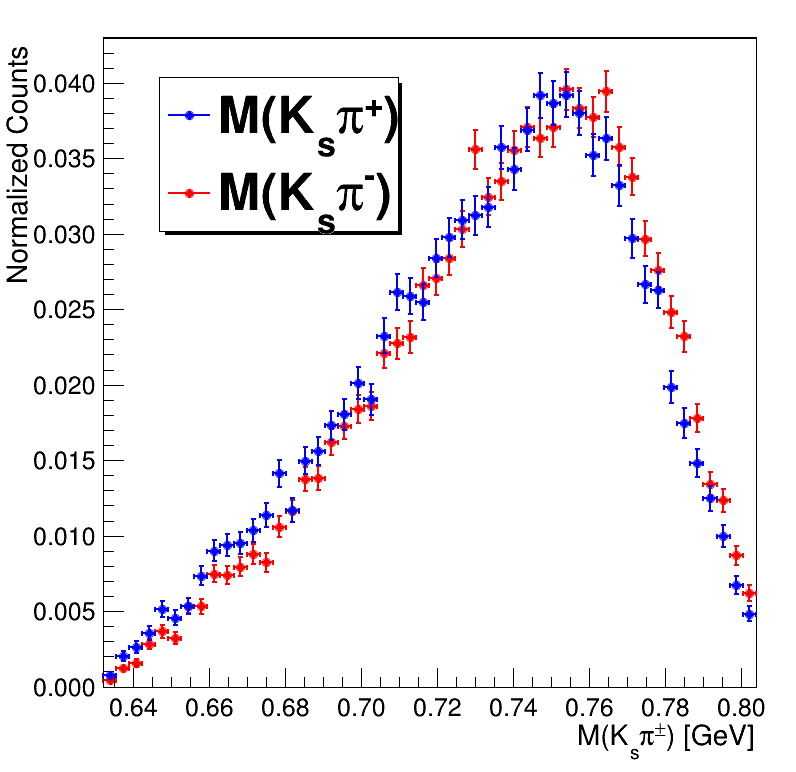

In [25]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.13)
hist_kspim.GetYaxis().SetTitle("Normalized Counts")
hist_kspim.GetYaxis().SetTitleOffset(1.7)
hist_kspim.GetXaxis().SetTitle("M(K_{s}#pi^{#pm}) [GeV]")
hist_kspim.Draw("E1")
hist_kspip.Draw("E1 SAME")
legend = ROOT.TLegend(0.2, 0.7, 0.5, 0.9)
legend.AddEntry(hist_kspip.GetPtr(), 'M(K_{s}#pi^{+})', 'lp')
legend.AddEntry(hist_kspim.GetPtr(), 'M(K_{s}#pi^{-})', 'lp')
legend.Draw()
c.Draw()

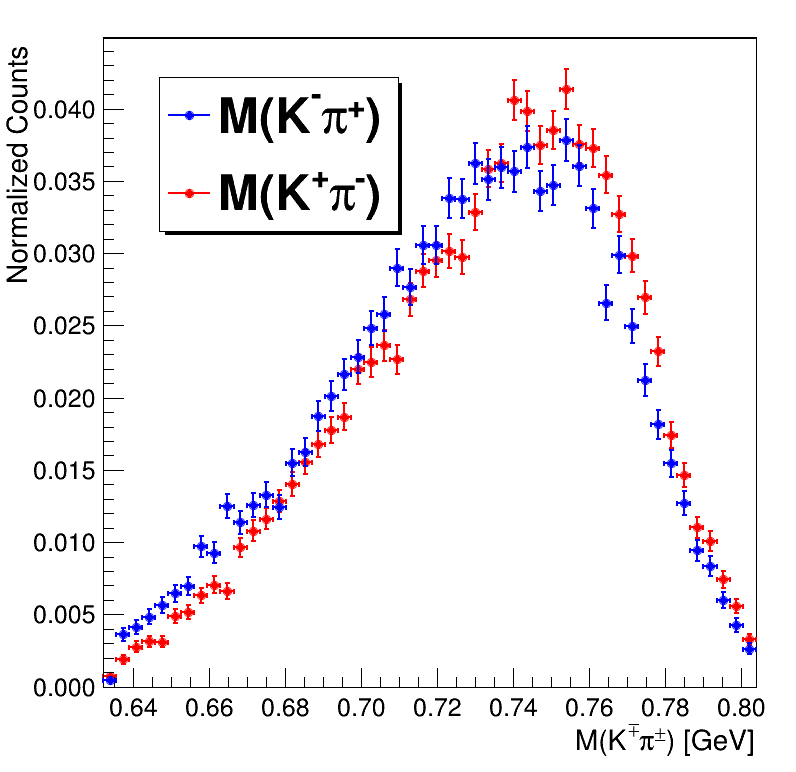

In [28]:
c.Clear()
hist_kppim.GetYaxis().SetTitle("Normalized Counts")
hist_kppim.GetYaxis().SetTitleOffset(1.7)
hist_kppim.GetXaxis().SetTitle("M(K^{#mp}#pi^{#pm}) [GeV]")
hist_kppim.Draw("E1")
hist_kmpip.Draw("E1 SAME")
legend = ROOT.TLegend(0.2, 0.7, 0.5, 0.9)
legend.AddEntry(hist_kmpip.GetPtr(), 'M(K^{-}#pi^{+})', 'lp')
legend.AddEntry(hist_kppim.GetPtr(), 'M(K^{+}#pi^{-})', 'lp')
legend.Draw()
c.Draw()
